# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 2.4: Residual Analysis

### 2.4.1 - Residual Analysis

The residuals, or errors, are the difference between your predicted model and the actual values observed. Residuals are almost always there - natural variance causes random fluctuations, and our model may not incorporate all relevant information to analyse.

Residuals can help you identify what changes to make to your model, and allow you to check your assumptions about the model are correct.

In this module, we will revisit some of the concepts we have looked at in previous modules, but specifically with a focus on the residuals of a model. Previous notebooks generally looked at the data itself before the model is fit, rather than after.

#### Exercise

Research "Anscombe's Quartet". What does it tell you about linear regression? How can residual analysis assist in finding issues caused by this type of problem?

Note: In this notebook we will only use simple linear regression models, but the analysis techniques are applicable to any model.

Let's start with a model that is accurate with regards to the data it is modelling:

In [1]:
%run setup.ipy

In [2]:
x = np.linspace(-10, 10, 100)
# y = 3x + 5 + e
y_linear = x * 3 + 5 + np.random.random(len(x)) * 15

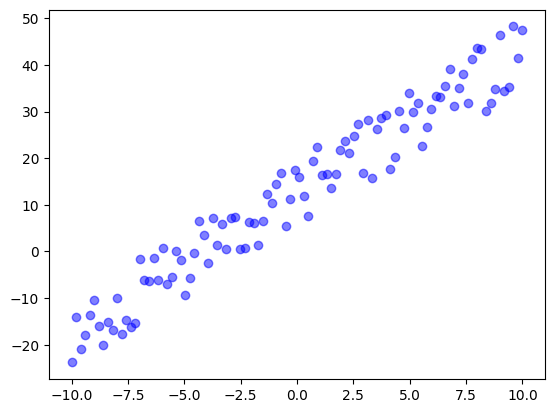

In [3]:
plt.plot(x, y_linear, 'bo', alpha=0.5)

Let's now fit a linear model, and then review the residuals of this model.

In [72]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y_linear, X)
results = model.fit()
y_pred = results.predict(X)

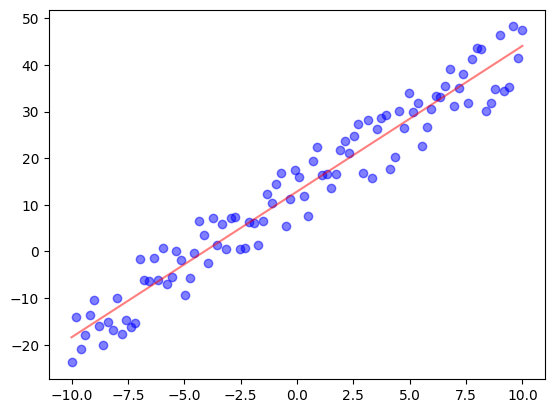

In [73]:
plt.plot(x, y_linear, 'bo', alpha=0.5)
plt.plot(x, y_pred, 'r-', alpha=0.5)

In [74]:
# Calculate the residuals
e_linear = y_pred - y_linear

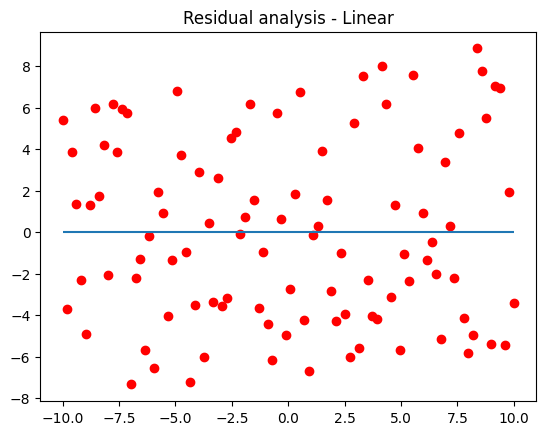

In [7]:
plt.title("Residual analysis - Linear")
plt.plot(x, e_linear, 'ro')
plt.hlines(0, xmin=x.min(), xmax=x.max())

In this plot, our linear model fits our linear data very well. As seen in the above plots, there is variability, but this residual plot, which plots the residuals against the x values, you can see a few very important components:

1. The errors are centred around 0
1. The errors look random, i.e. there are no trends
1. The variability of the errors does not change

We will now look at some examples of each of these three components not being seen.

### Errors Centred Around 0
It is a property of the linear regression model that errors will be centred around 0. In other words, regardless of your data, your residuals will be centred around zero. More formally, the expected value of the errors will be 0. For instance, here is a sine curve with a linear model fitted, and you can still see the errors are centred around zero:

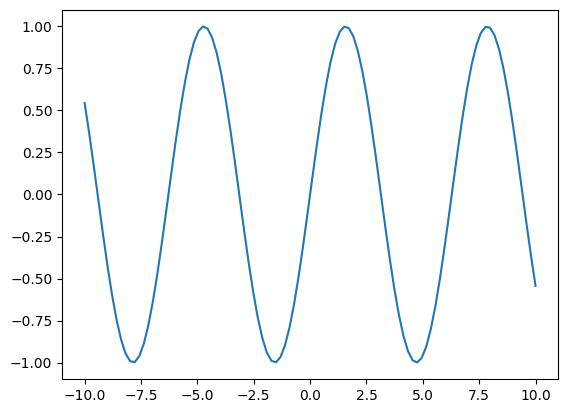

In [8]:
y_sin = np.sin(x)
plt.plot(x, y_sin)

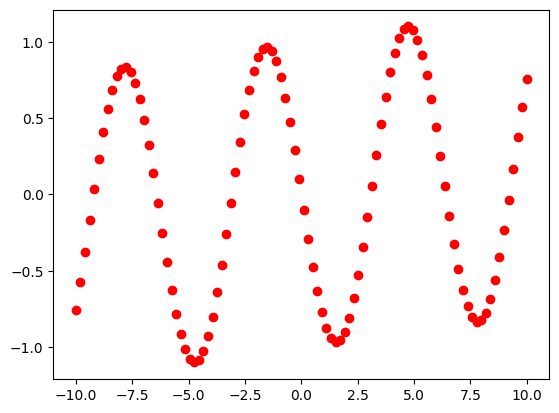

In [9]:
model = sm.OLS(y_sin, X)  # Capital X, which has constants already
results = model.fit()
y_pred = results.predict(X)

e_sin = y_pred - y_sin
plt.plot(x, e_sin, 'ro')

There is a pattern here (we will come to that, but the residuals are still centred around zero. Due to this, the most common cause of your residuals not being centred around zero is actually a *coding* error, where some issue in the handling of your data has occurred or a computer bug.

That said, if you forget to add a constant, it can happen too. Here we fit a linear model to our linear data, but forget the constant:

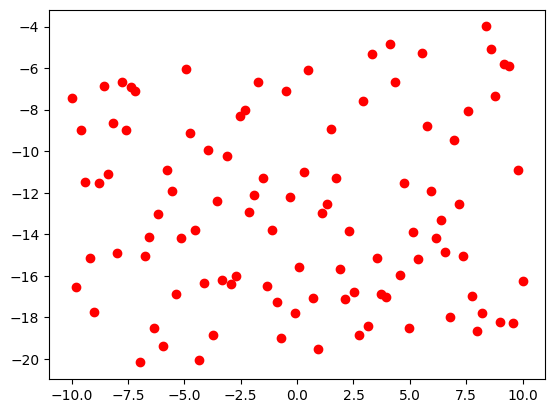

In [10]:
model = sm.OLS(y_linear, x)  # lowercase x, with no constant
results = model.fit()
y_pred = results.predict(x)

e_linear_no_constant = y_pred - y_linear
plt.plot(x, e_linear_no_constant, 'ro')

Here you can see the same spread of errors as our previous model, just not centred around zero. If you see errors not centred around zero, check for a constant, and then check your code for bugs! 

#### Exercise

Write a function `fit_linear_plot_residuals` that takes the x and y values as input, fits a linear model, computes the residuals and then plots the residual plot. We will use this for the rest of our notebook.

In [11]:
import statsmodels.api as sm
def fit_linear_plot_residuals(x,y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    results = model.fit()
    y_pred = results.predict(X)
    e_linear = y_pred - y
    plt.title("Residual analysis - Linear")
    plt.plot(x, e_linear, 'ro')
    plt.hlines(0, xmin=x.min(), xmax=x.max())   

*For solutions, see `solutions/fit_linear_plot_residuals.py`*

In [14]:
# The next cell runs the solution, as it is needed. If you implemented your own (or improved it!)
# then you can run your version here instead.

In [21]:
%run -i solutions/fit_linear_plot_residuals.py

<Figure size 432x288 with 0 Axes>

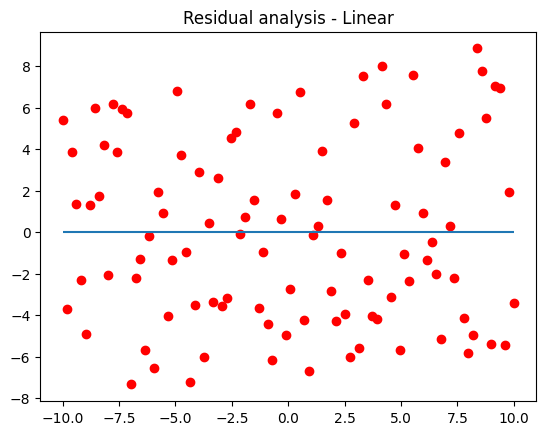

In [12]:
fit_linear_plot_residuals(x, y_linear)

### Errors must look random

In addition to being centred around zero, errors must "look random". We have formal methods for this, but when doing statistical analysis, a good starting point is to plot the residuals and just eyeball the results. We saw in the linear examples above, the residuals are scatted around 0, with no clear patterns. Let's look at a counter example: 

In [13]:
# y = 3x**2 - 4x + 10 + e
y_quad = 3 * x ** 2 - 4 * x + 10 + np.random.random(len(x)) * 90

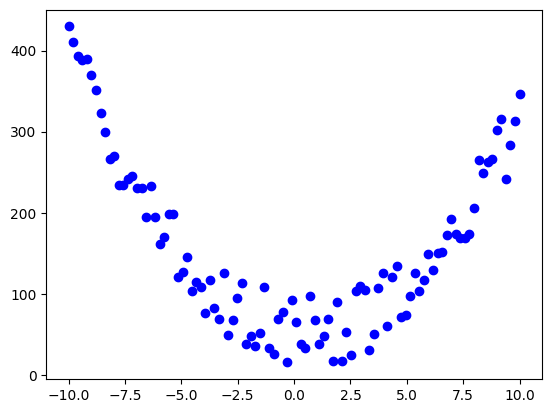

In [14]:
plt.plot(x, y_quad, 'bo')

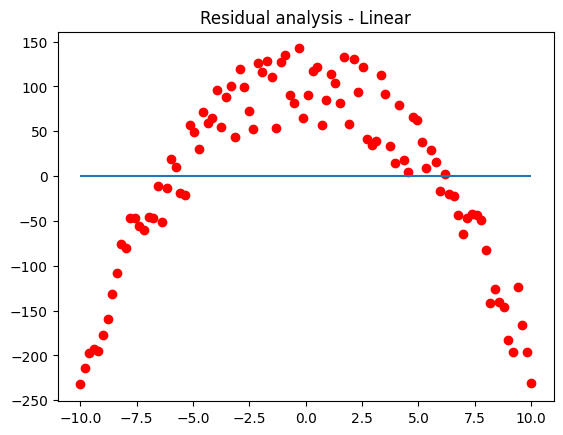

In [15]:
fit_linear_plot_residuals(x, y_quad)

Here, we can see a clear pattern in the residuals - there is an area of negative residuals, then an area of positive residuals and then another area of negative residuals. Whenever you can predict a residual based on the previous residual, you have a pattern. More formally, we want residuals to be iid - that is, independently and identically distributed.

Note that other patterns may exist too - for instance, if the errors consistently "flip" between positive and negative, that is another pattern that should be accounted for.

For example, the BDS test statistic tests for independence in a time series. It tests the following hypotheses:

* $H_0$: The data is independent and identically distributed
* $H_A$: The data has some autocorrelation

#### Exercise

1. Using the `statsmodels.tsa.stattools.bds` function, test if the residuals above exhibit some autocorrelation.
2. Using a different test from a previous notebook, test again for autocorrelation

In [20]:
from statsmodels.tsa.stattools import bds

X = sm.add_constant(x)
model = sm.OLS(y_quad, X)
results = model.fit()
y_pred = results.predict(X)
e_linear = y_pred - y_quad

bds_stat, pvalue = bds(e_linear)
pvalue

array(6.3140173e-142)

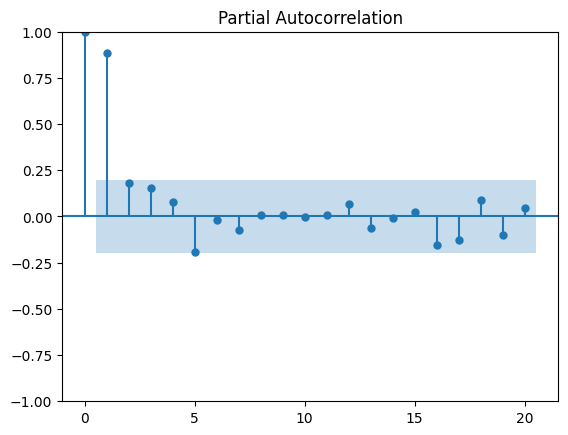

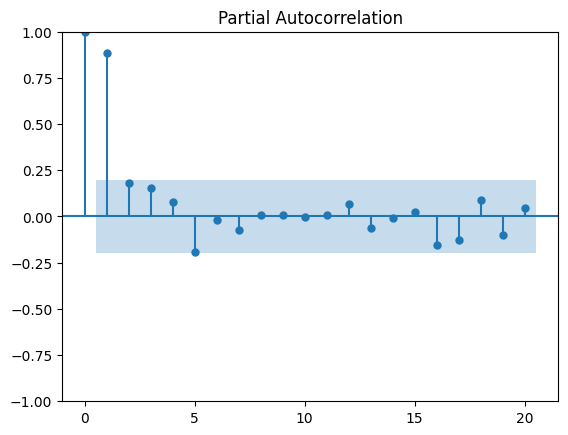

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(e_linear)

Other patterns may be present in your data. For instance, seasonal trends are seen in many datasets, and this shows significantly in a residual plot.

*For solutions, see `solutions/residual_analysis_one.py`*

In [22]:
# y = sin(2{pi}x/12) + 3x + e
# x is "months" since start
x = np.linspace(0, 36)
y_seasonal = np.sin(x * 2 * np.pi / 12) + (0.5 * x) + np.random.random(len(x)) * 2

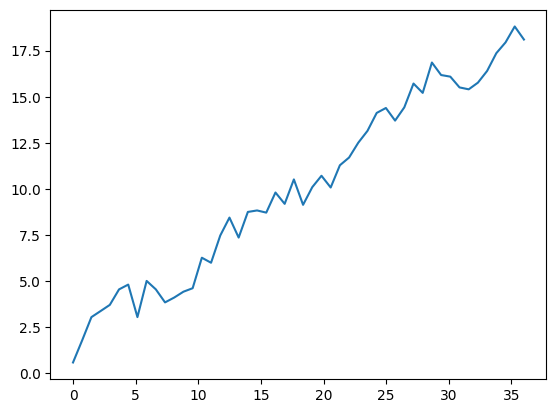

In [23]:
plt.plot(x, y_seasonal)

It is a bit hard to see the seasonal trend, as it is masked by the strong linear trend and errors.

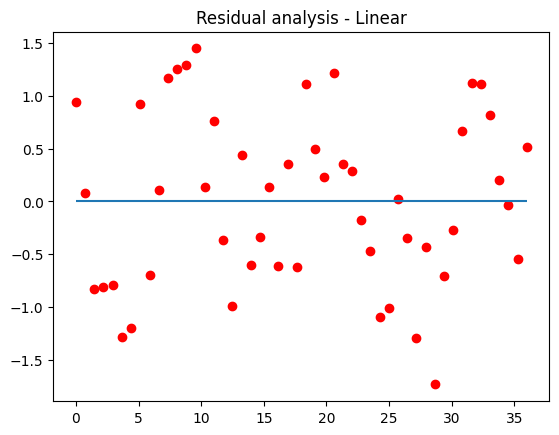

In [24]:
fit_linear_plot_residuals(x, y_seasonal)

Even though the seasonal trend was present in the original data, it is more pronounced in the residual plot, which has the effect of demeaning, detrending and rescaling the data, showing patterns like this more clearly.

#### Exercise

Investigate the `statsmodels.tsa.seasonal.seasonal_decompose` method for removing a known seasonal trend from data. Remove the "seasonal" trend from the data above (assume that the x value is "number of months") and fit a linear model to the non-seasonal data. Check the residuals of this fit.

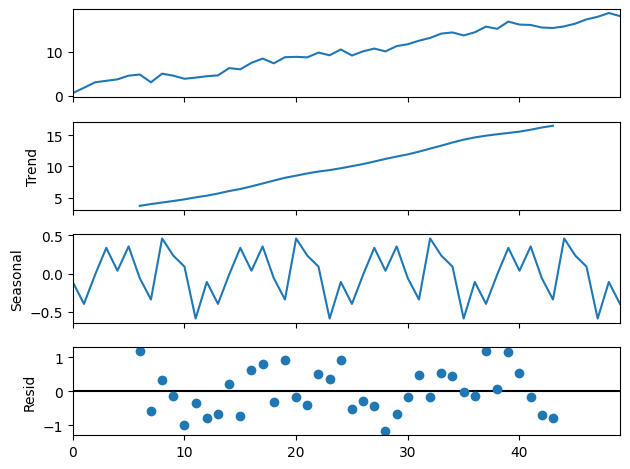

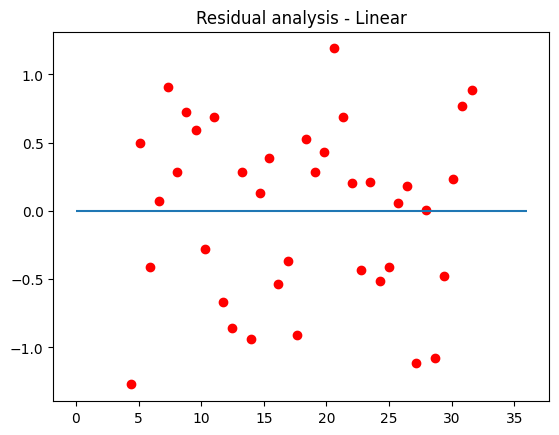

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

y_reasonal_decomop = seasonal_decompose(y_seasonal, model="additive", period=12)

X = sm.add_constant(x)
nans = y_reasonal_decomop.resid.isna()
model = sm.OLS(y_reasonal_decomop.resid.dropna(), X[~nans])
results = model.fit()
y_pred = results.predict(X[~nans])
e_linear = y_pred - y_reasonal_decomop.resid.dropna()

y_reasonal_decomop.plot()
plt.show()

plt.title("Residual analysis - Linear")
plt.plot(x[~nans], e_linear, 'ro')
plt.hlines(0, xmin=x.min(), xmax=x.max())   

In [59]:
bds_stat, pvalue = bds(e_linear)
pvalue

array(2.81136825e-05)

### The variability of the errors does not change

A common issue that arises in datasets is that the variability of the errors changes with time (or increasing x for non-time series). This is a common occurrence in time series analysis. For example, as a stock price increases, a "5% swing" becomes a greater value. This is one reason to transform the data, but this pattern occurs in many other datasets. 

Let's have a look at some data:

In [63]:
x = np.linspace(-10, 10, 100)

# y = 3x + 5 + e*x
y_variation = 3 * x + 5 + np.random.random(len(x)) * x

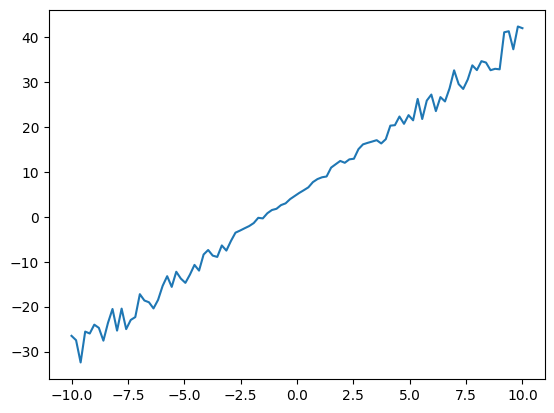

In [64]:
plt.plot(x, y_variation)

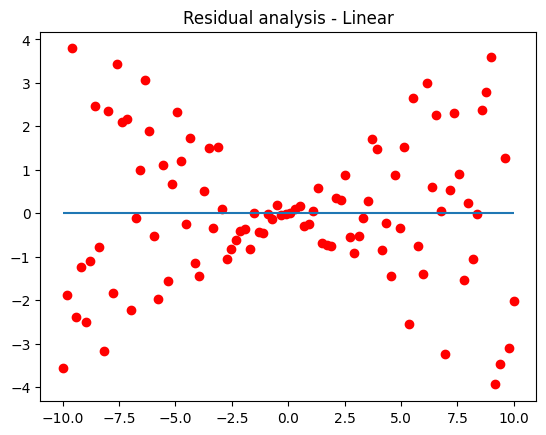

In [65]:
fit_linear_plot_residuals(x, y_variation)

It may be tempting in the first plot (`x` versus `y_variation`) to simply discard the "random noise" at the top and bottom, but the residual plot highlights quite clearly that the variation changes dramatically as x does. The data starts with a very high variability, moves to a very low variability and then again to a very high variability. 

Important: "high" and "low" are subjective, and relative to the general variability in the data. Do not apply a blanket rule like "variability above 4 is bad".

This data is said to have violated the assumption of homoscedasticity for OLS. In cases of strong variability, the OLS estimator is still consistent, and generally works "well enough". It would be important to report that estimations in the areas of high variability would have less precision than predictions in areas of low variability. Weighted least squares could help as well.

If you have control over the data itself, investigate what is causing the variability and look to remove it. For instance, if we are measuring a car's performance, the variability might be high in the morning with a cold-start of the engine. As it warms up, the engine performs more consistently. Remove this impact, or fit the data to the different "cold start" and "warm start" categories.

#### Exercise

Create a plot with variability increasing over time, and plot the residual graph.

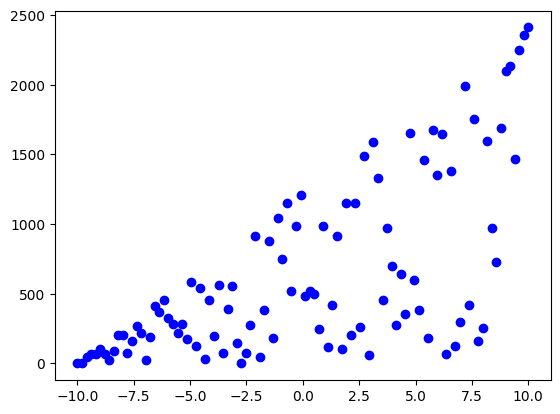

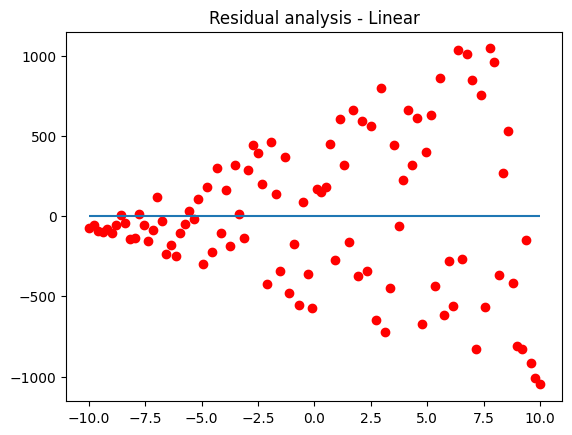

In [69]:
#from solutions
y_increasing = np.random.random(len(x)) * np.arange(len(x)) * 25  # Your equation may vary

plt.plot(x, y_increasing, 'bo')
plt.show()

fit_linear_plot_residuals(x, y_increasing)

*For solutions, see `solutions/increasing_variability.py`*

### QQ plots

A common method of analysing residuals is to look at the QQ plot, the quantile-quantile plot. It plots the quantiles of the residuals against the quantiles of a normal distribution. If the residuals are normally distributed, this plot will show a straight diagonal line with random variability around that line.

In [70]:
from statsmodels.graphics.gofplots import qqplot

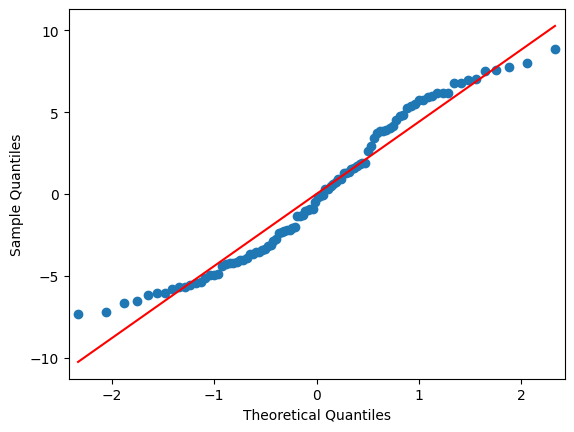

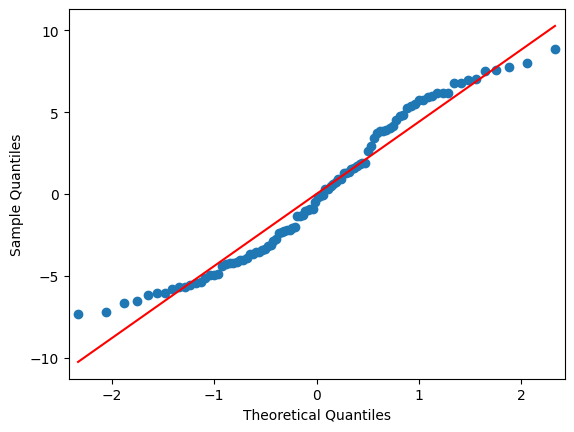

In [75]:
qqplot(e_linear, line='s')

#### Question

The errors are from a linear model fitting linear data with noise. Why isn't the plot above showing a straight line, and instead showing a clear pattern?

Hint: Show a histogram of the errors and review the documentation of the qqplot graph.

Came from a uniform distribution

*For solutions, see `solutions/why_not_normal.py`*

If we plot the QQ plot comparing the residuals to the x values, we get a straighter line and more randomness of the errors around this line. This would lead you to think that the errors are randomly distributed around that line:

In [76]:
from statsmodels.graphics.gofplots import qqplot_2samples

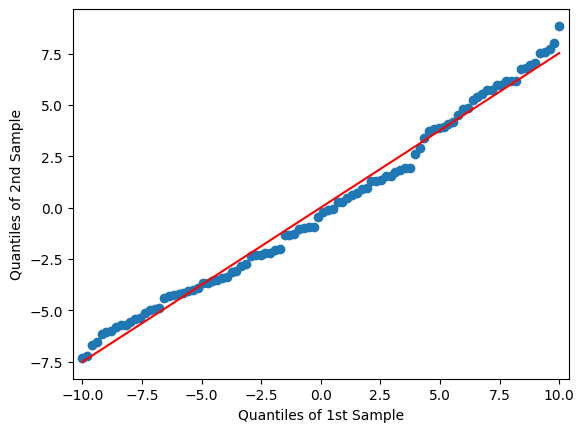

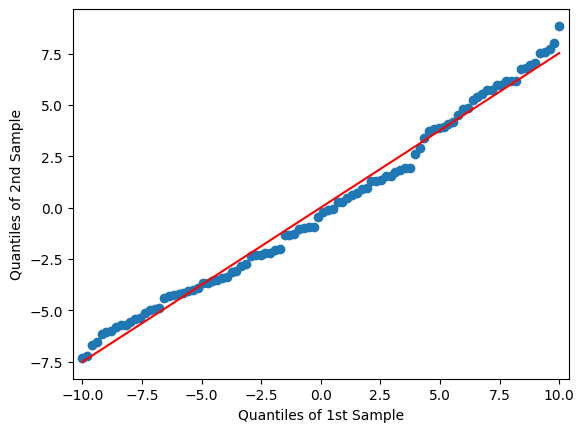

In [78]:
qqplot_2samples(x, e_linear, line='r')

In other words, this graph shows us that the errors do not seem to be dependent on the x variables.

#### Exercise

Plot the QQ plots (both against a normal distribution and a 2 sampled QQ plot) for the other datasets we generated in this module. What do their patterns show?

#### Extended Exercise

When fitting a linear model, a common visualisation is to output the following four graphs in a subplot with two columns and two rows:

1. A plot comparing the Predicted values on (x-axis) against the Actual values (y-axis) with a diagonal line
1. The residuals (y-axis) versus the x values scatter plot with a horizontal line at y=0
1. A QQ plot of the residuals against a normal distribution
1. A QQ plot of the residuals against the x values

Create a function that takes the necessary inputs and produces these four plots. This function, or variations of it, are incredibly useful for future analysis.

*For solutions see `solutions/residual_analysis_two.py`*

### Autocorrelation in Residuals

Another issue that can arise is when there is autocorrelation in the residuals. This happens when the data is noisy in the "macro" sense, but correlated in the "micro" sense.

Here is an example:

In [79]:
# Generate a dataset
# Errors have a autocorrelation with lag 1
errors = np.random.randn(len(x)) * 3 + 5
# Errors are dependent on the previous error to some degree
errors[1:] += 0.5 * errors[:-1]

In [80]:
# y = mx + c + e
y_corr = 2 * x + 6 + errors

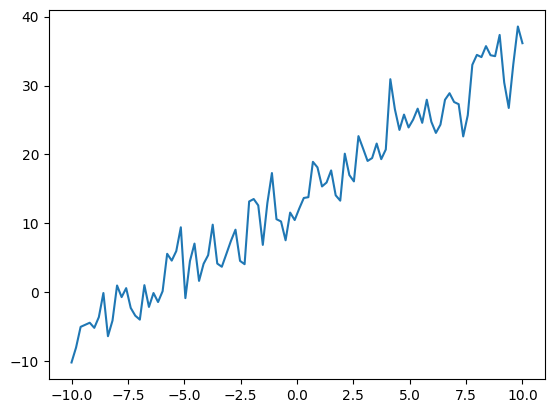

In [81]:
plt.plot(x, y_corr)

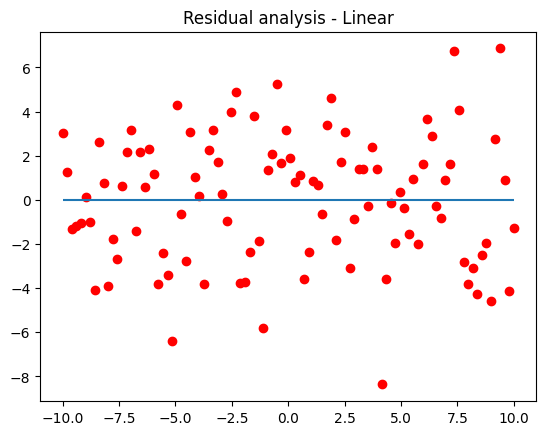

In [82]:
fit_linear_plot_residuals(x, y_corr)

In the above graph, the errors *look* random enough, and it would be hard to actually see any correlation here. Especially with so many data.

However, let us extract the residuals and test for autocorrelation.

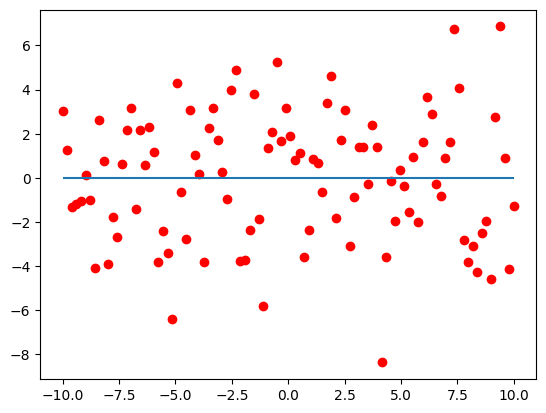

In [83]:
X = sm.add_constant(x)
model = sm.OLS(y_corr, X)  # Capital X, which has constants already
results = model.fit()
y_pred = results.predict(X)

e_corr = y_pred - y_corr
plt.plot(x, e_corr, 'ro')
plt.hlines(0, xmin=x.min(), xmax=x.max())

In [84]:
from statsmodels.graphics.tsaplots import plot_acf

In [50]:
autocorrelation_plot??

Object `autocorrelation_plot` not found.


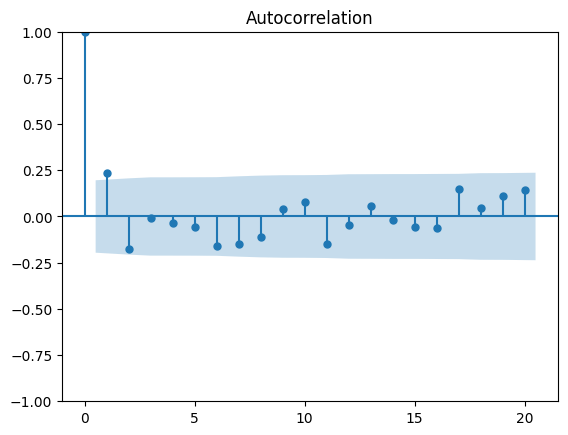

In [85]:
plot_acf(e_corr, lags=20);

This plot shows a clear autocorrelation in the residuals at lag 1. Other values, such as 11 and 14 show a "significant" autocorrelation, but unless you had a significant reason to suspect a cyclic trend of this length (for instance, if your customers are on a 14 week rolling schedule), I would consider this "unlucky" in the null-hypothesis-false-positive sense.

In this case, the residuals are not white noise and therefore we must examine for other trends in the data we are not accounting for. In this case, revisit some of the models we have seen, such as ARIMA, which is likely to be able to address this problem. In cases of autocorrelation, OLS is unable to adequately address the issue by itself.